#**CS 351L - AI Lab - Lab 8 (Solution)**

# **Details:**
- **Name: Muhammad Bilal**
- **Registration No. 2022359**
- **Course Code:** CS 351L
- **Program:** BS Cybersecurity
- **Semester:** 5th


# **PART#01 (SOLUTION):**



In [18]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)



## **Step 1: Load and Preprocess the Data**
We will use the Iris dataset for classification.
    

In [10]:
# Load the Iris dataset
from sklearn.datasets import load_iris  # Iris dataset is part of scikit-learn
iris = load_iris()  # Load the dataset into memory
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Names of target classes

# One-hot encode the labels (convert categorical to binary vectors)
encoder = LabelBinarizer()  # Initialize encoder
y_encoded = encoder.fit_transform(y)  # Fit and transform labels

# Standardize the features (scale to have mean 0 and variance 1)
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Print the number of samples in training and testing sets
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 105, Testing samples: 45



## **Step 2: Build the Neural Network**
We will use the Keras API to build a simple feedforward neural network.
    

In [11]:

# Build the neural network
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer with ReLU activation
    Dense(8, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer with ReLU activation
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer with softmax for classification
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer for efficient training
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate model accuracy

# Display a summary of the model structure
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)


## **Step 3: Train the Neural Network**
Visualize the training progress using loss and accuracy plots.
    

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3697 - loss: 1.0351 - val_accuracy: 0.4762 - val_loss: 0.9483
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3727 - loss: 0.9984 - val_accuracy: 0.4762 - val_loss: 0.9189
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3769 - loss: 0.9676 - val_accuracy: 0.5238 - val_loss: 0.8922
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3839 - loss: 0.9400 - val_accuracy: 0.4762 - val_loss: 0.8670
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3956 - loss: 0.9146 - val_accuracy: 0.4762 - val_loss: 0.8443
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4311 - loss: 0.8911 - val_accuracy: 0.5238 - val_loss: 0.8233
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4865 - loss: 0.8689 - val_accuracy: 0.5714 - val_loss: 0.8042
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5352 - loss: 0.8478 - val_accuracy: 0.5714 - val_loss

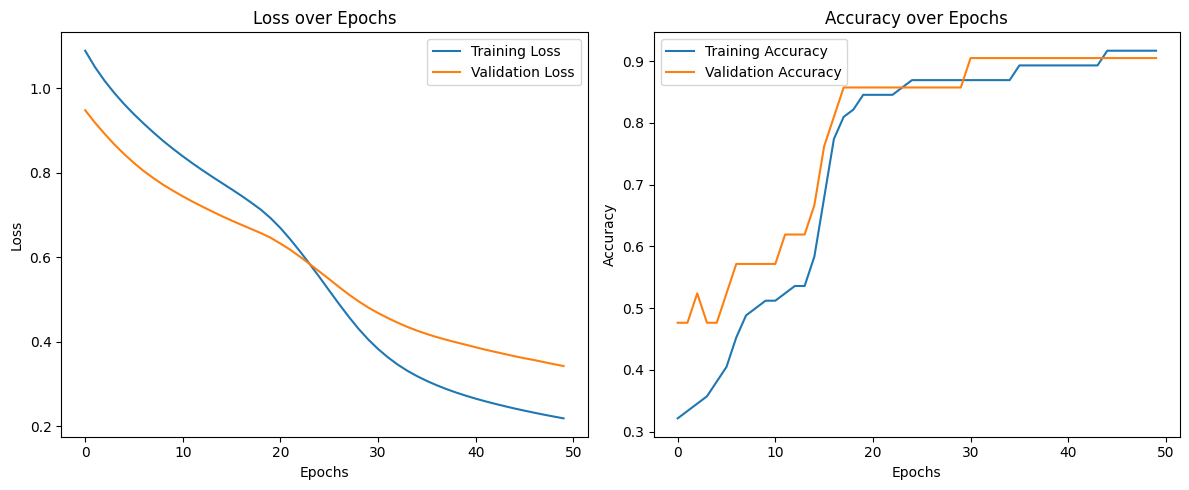

In [4]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))  # Set figure size

# Loss plot
plt.subplot(1, 2, 1)  # First subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.title('Loss over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Display legend

# Accuracy plot
plt.subplot(1, 2, 2)  # Second subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.title('Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots



## **Step 4: Evaluate the Neural Network**
Evaluate the model on the test data and visualize the confusion matrix.
    

Test Loss: 0.2164, Test Accuracy: 0.8889
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.62      0.76        13
   virginica       0.72      1.00      0.84        13

    accuracy                           0.89        45
   macro avg       0.91      0.87      0.87        45
weighted avg       0.92      0.89      0.88        45



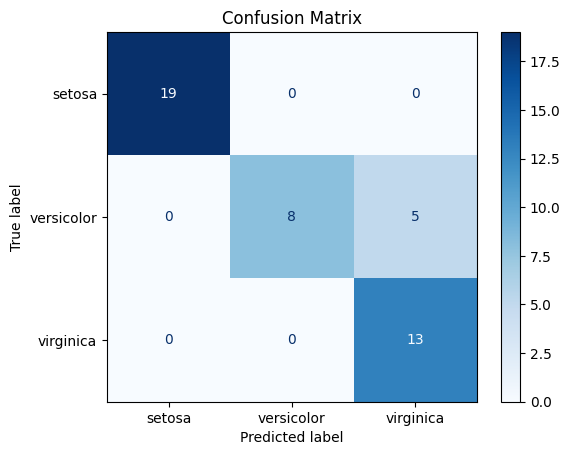

In [5]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate without verbose output
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")  # Print test loss and accuracy

# Generate predictions for test data
y_pred = model.predict(X_test)  # Predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



## **Step 5: Visualize the Neural Network Architecture**
Display the architecture of the neural network using Keras utilities.
    

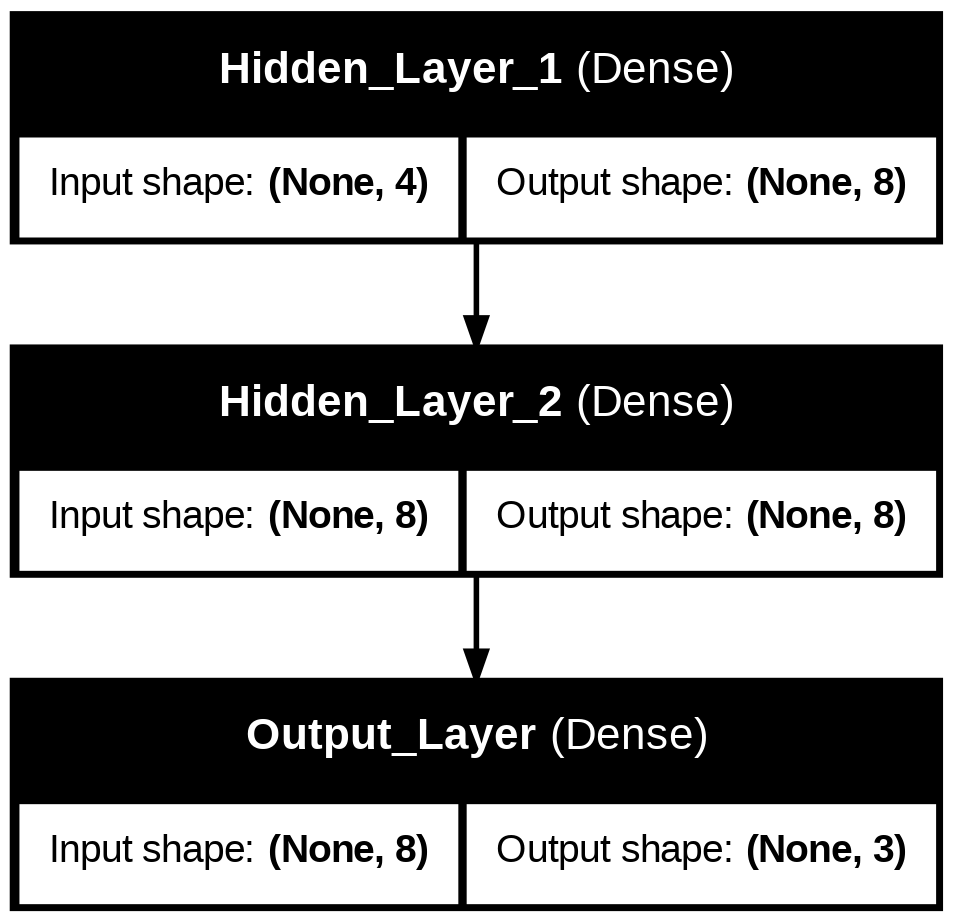

In [6]:

# Visualize the model architecture
from tensorflow.keras.utils import plot_model  # Utility to plot model architecture

# Save the architecture plot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')  # Save as PNG

# Display the saved image
from IPython.display import Image
Image(filename='model_architecture.png')



# **PART#02 (SOLUTION):**
    

In [13]:
# Load the Wine dataset
from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [14]:
# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.1232 - loss: 1.1497 - val_accuracy: 0.0370 - val_loss: 1.1997
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1379 - loss: 1.1149 - val_accuracy: 0.0370 - val_loss: 1.1657
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1819 - loss: 1.0821 - val_accuracy: 0.0741 - val_loss: 1.1324
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2231 - loss: 1.0508 - val_accuracy: 0.1111 - val_loss: 1.1012
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2422 - loss: 1.0208 - val_accuracy: 0.1111 - val_loss: 1.0709
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2980 - loss: 0.9920 - val_accuracy: 0.1481 - val_loss: 1.0412
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4320 - loss: 0.9641 - val_accuracy: 0.2963 - val_loss: 1.0124
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5059 - loss: 0.9372 - val_accuracy: 0.3704 - val_loss: 0.9840
Epoch 9/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


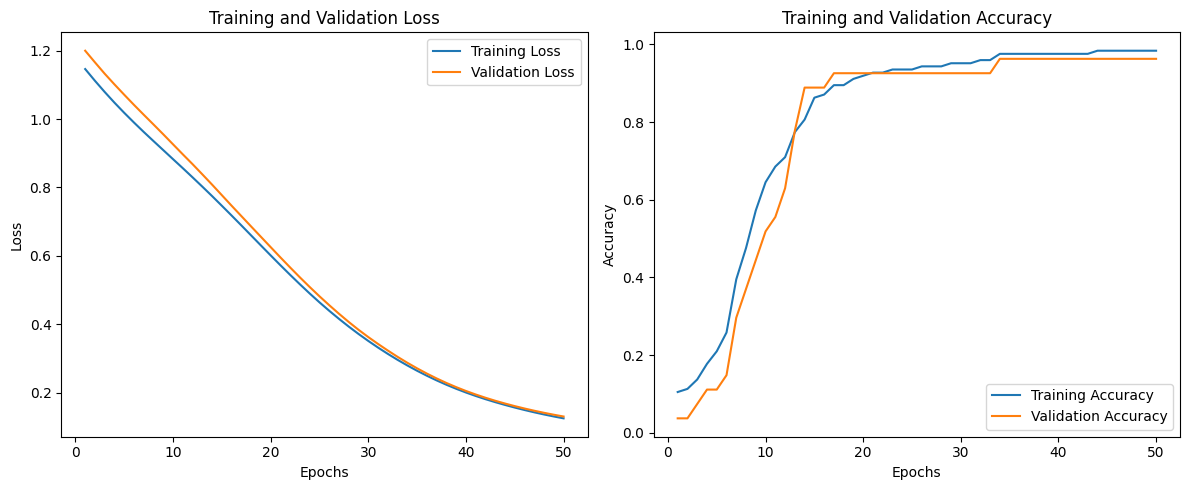

In [20]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predictions and confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot training and validation loss/accuracy
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


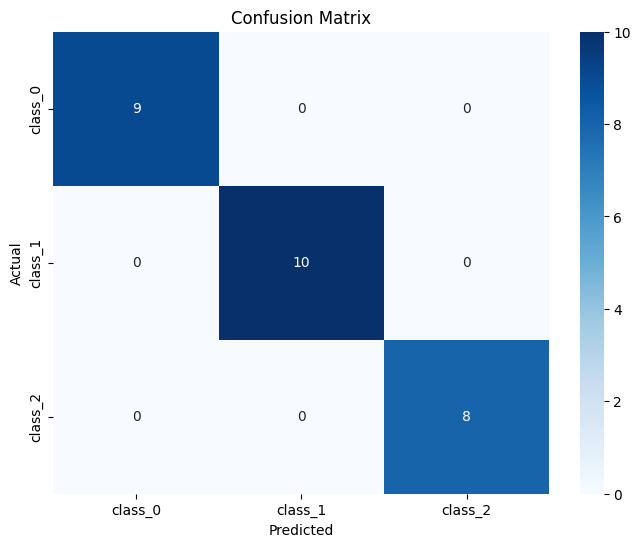

In [23]:
# Display confusion matrix (Approach I like)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.1174
Test Accuracy: 1.0000
